## Libararies EXport 

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px

**Read the CSV file**

In [4]:
df = pd.read_csv(r'D:\AI Course\employee_data.csv')

**EDA**

- Display the data set colomns 

In [5]:
df.columns

Index(['ID', 'Gender', 'Experience (Years)', 'Position', 'Salary'], dtype='object')

- Display the dataset information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  400 non-null    int64 
 1   Gender              400 non-null    object
 2   Experience (Years)  400 non-null    int64 
 3   Position            400 non-null    object
 4   Salary              400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [7]:
df.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [8]:
df.tail()

,ID,Gender,Experience (Years),Position,Salary
395,396,F,19,Cloud Solutions Architect,236045
396,397,F,20,Web Developer,182770
397,398,F,9,Network Administrator,85550
398,399,M,18,Database Administrator (DBA),129996
399,400,F,11,IT Security Analyst,169058


- Continous Data decribing

In [9]:
df.describe()

,ID,Experience (Years),Salary
count,400.000000,400.000000,400.00000
mean,200.500000,9.670000,131701.19750
std,115.614301,6.101571,43351.50899
min,1.000000,0.000000,43643.00000
25%,100.750000,4.000000,100484.75000
50%,200.500000,10.000000,128561.50000
75%,300.250000,15.000000,157735.00000
max,400.000000,20.000000,269950.00000


- Check Outlaiers

<Axes: >

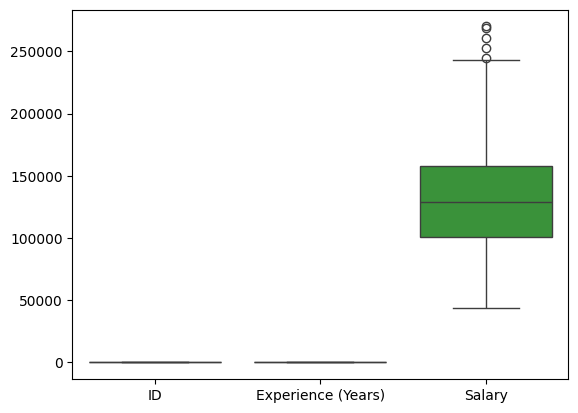

In [10]:
sns.boxplot(df)

**Unary column ananlysis**

 - Gender

In [11]:
Data = df['Gender'].value_counts()

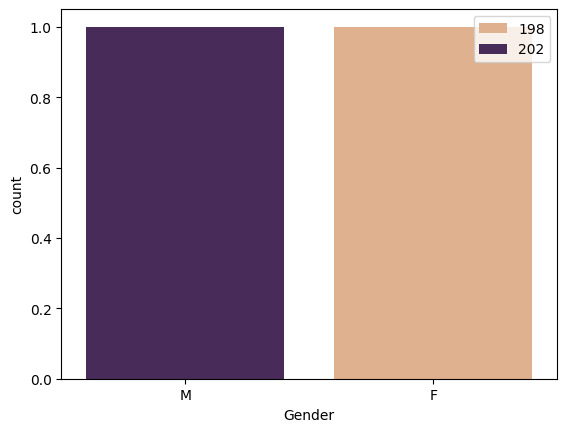

In [12]:
sns.countplot(x=Data.index,hue= Data.values,palette='flare');

- Experience

In [13]:
df['Experience (Years)'].describe()

count    400.000000
mean       9.670000
std        6.101571
min        0.000000
25%        4.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: Experience (Years), dtype: float64

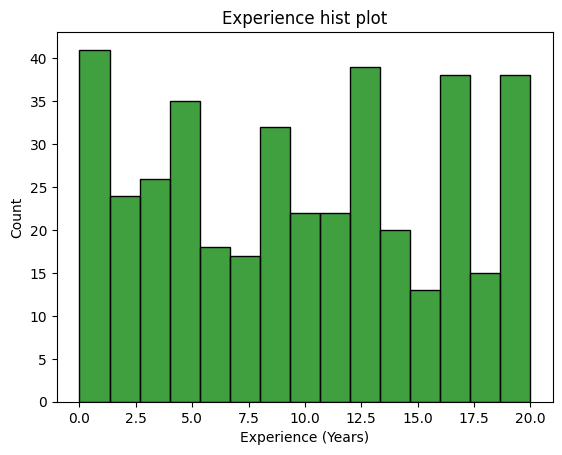

In [14]:
sns.histplot(df['Experience (Years)'],bins=15,color='green')
plt.title('Experience hist plot');

- Position

In [15]:
Data2 = df['Position'].value_counts()

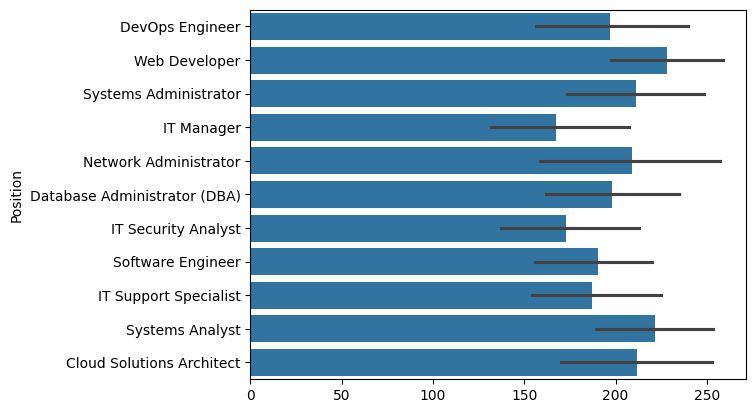

In [16]:
sns.barplot(df['Position'],);

In [17]:
px.bar(df['Position'])

- Salary

In [18]:
df['Salary'].describe()

count       400.00000
mean     131701.19750
std       43351.50899
min       43643.00000
25%      100484.75000
50%      128561.50000
75%      157735.00000
max      269950.00000
Name: Salary, dtype: float64

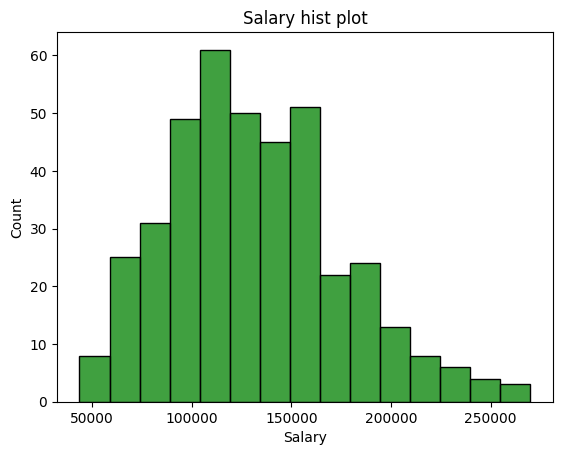

In [19]:
sns.histplot(df['Salary'],bins=15,color='green')
plt.title('Salary hist plot');

## **String Columns encoding**

In [20]:
Encoder1 = LabelEncoder()
df['Gender']=Encoder1.fit_transform(df['Gender'])

In [21]:
Encoder2 = LabelEncoder()
df['Position']=Encoder1.fit_transform(df['Position'])

In [22]:
try:
   df2 = df.drop(columns=['ID','Gender'],inplace=True)
except KeyError as e :
   print('Columns are not exist in the data frame',e)




## **Multivarient Analysis**

In [23]:
df

,Experience (Years),Position,Salary
0,4,2,109976
1,6,2,120088
2,17,10,181301
3,7,8,77530
4,13,8,152397
...,...,...,...
395,19,0,236045
396,20,10,182770
397,9,6,85550
398,18,1,129996


<Axes: >

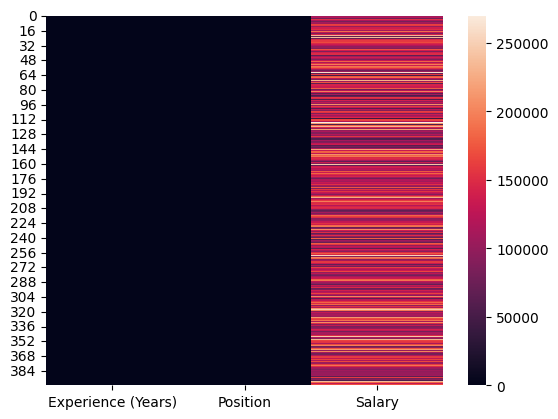

In [24]:
sns.heatmap(df)

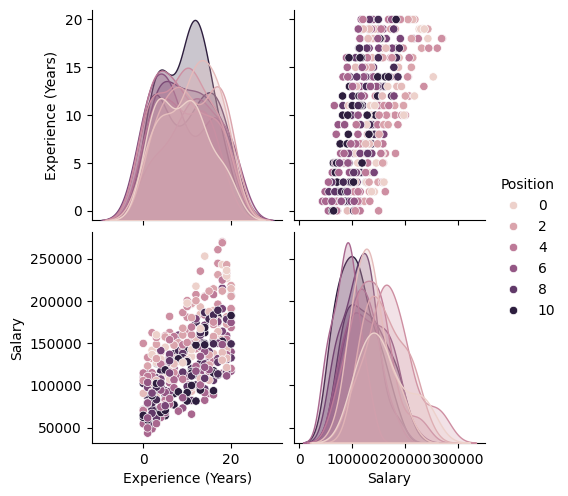

In [25]:
sns.pairplot(df,hue='Position');

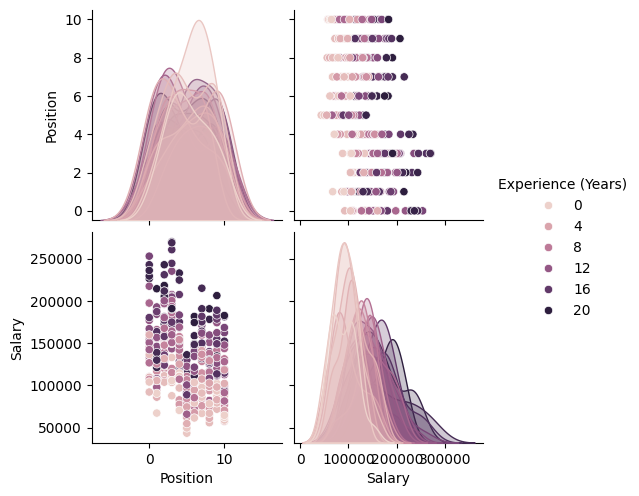

In [26]:
sns.pairplot(df,hue='Experience (Years)');

## **Models**

In [27]:
x = df.drop(columns='Salary')
y = df['Salary']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)

In [29]:
Model_1 = LinearRegression()

In [30]:
Model_1.fit(x_train,y_train)

LinearRegression()

In [31]:
y1_pred = Model_1.predict(x_test)

In [32]:
mean_squared_error(y_test,y1_pred)

815019868.40369

In [33]:
mean_absolute_error(y_test,y1_pred)

24040.927734627

In [34]:
mean_absolute_percentage_error(y_test,y1_pred)*100

20.38101286154875

In [35]:
r2_score(y_test,y1_pred)

0.48803028121372327

In [36]:
Model2 =DecisionTreeRegressor(criterion='squared_error',random_state=42,)

In [37]:
Model2.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [38]:
y2_pred = Model2.predict(x_test)

In [39]:
Error = mean_squared_error(y_test,y2_pred)
Error

1013872685.9592015

In [40]:
E = np.sqrt(Error)

In [41]:
E

31841.367526524384

In [42]:
mean_absolute_error(y_test,y2_pred)

25706.35486111111

In [43]:
mean_absolute_percentage_error(y_test,y2_pred)*100

21.918951671687694

In [57]:
r2_score(y_test,y2_pred)

0.3631172269060363

In [44]:
parma_grid = {
    'max_depth' : [3,4,5,7,8,10],
    'min_samples_split' : [2,3,4,5,6,7,8,9],
    'max_features' : [2],
}

In [45]:
Regressor =DecisionTreeRegressor()

In [46]:
Model3 = GridSearchCV(estimator= Regressor,param_grid=parma_grid,cv=10,scoring= 'neg_mean_squared_error',n_jobs=-1,verbose=1 )

In [47]:
Model3.fit(x_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 7, 8, 10], 'max_features': [2],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_squared_error', verbose=1)

In [48]:
Model3.best_params_

{'max_depth': 5, 'max_features': 2, 'min_samples_split': 6}

In [49]:
Model3.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features=2, min_samples_split=6)

In [50]:
Best_Model = Model3.best_estimator_

In [51]:
y3_pred = Best_Model.predict(x_test)

In [52]:
Error1 = mean_squared_error(y_test,y3_pred)
Error1

726371130.4779332

In [53]:
RMS_Error = np.sqrt(Error1)
RMS_Error

26951.273262648152

In [54]:
mean_absolute_error(y_test,y3_pred)

21519.03180894269

In [55]:
mean_absolute_percentage_error(y_test,y3_pred)*100

18.512737059365094

In [56]:
r2_score(y_test,y3_pred)

0.543716616217434

## **Note**

-  The Best Model is Number 3 : Model3